This final contains plots for quantum states defined by jaynes-cummings hamiltonian, when passed through different decoherence channels, under the influence of memory.

The kraus operators taken have been defined in the paper by [Ahadpour and Mirmasoudi](https://doi.org/10.1007/s11082-020-02474-7)

Importing Modules

In [3]:
import numpy as np
from numpy import math
import array as arr
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\Aayush Jukaria\AppData\Local\Temp\ipykernel_11244\3433802915.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


Functions

In [4]:
#defining functions
def P(n):
    Pn = np.exp(-n/2)*np.sqrt((np.power(n,n)/ math.factorial(n)))
    return Pn    

def Concurrence(t,l, memory, channel):
    N = np.square(P(n-1)*np.sin(t*np.sqrt(n))) + np.square(P(n)) + np.square(P(n+1)*np.cos(t*np.sqrt(n+2)))

    k1 = np.square(P(n-1)*np.sin(t*np.sqrt(n)))/N
    k2 = np.square(P(n)*np.cos(t*np.sqrt(n+1)))/N
    k3 = (1j/N)*(np.square(P(n))*(np.sin(t*np.sqrt(n+1)))*(np.cos(t*np.sqrt(n+1))))
    k4 = np.square(P(n)*np.sin(t*np.sqrt(n+1)))/N
    k5 = np.square(P(n+1)*np.cos(t*np.sqrt(n+2)))/N
 
    rho_init = np.matrix([[k1,0,0,0],
                     [0,k2,k3,0],
                     [0,-k3,k4,0],
                     [0,0,0,k5]])
    if channel == 'AD':
        rho_final = AD(rho_init,l, memory)
    elif channel == 'PD':
        rho_final = PD(rho_init, l, memory)
    elif channel == 'DE':
        rho_final = DE(rho_init, l, memory)
    elif channel == 'PF':
        rho_final = PF(rho_init, l, memory)
    else:
        raise ValueError("Channel can be AD, PD, DE or PF but given channel is ",channel)

    A1 = np.absolute(rho_final[0,3]) - np.sqrt(rho_final[1,1]*rho_final[2,2])
    A2 = np.absolute(rho_final[1,2]) - np.sqrt(rho_final[0,0]*rho_final[3,3])
    conc = 2*(max(0,A1,A2))
    return conc

def AD(rho_init,l, memory):
    #defining Kraus Operators
    E0 = np.matrix([[1,0],
                    [0,np.sqrt(1-l)]])
    E1 = np.matrix([[0,np.sqrt(l)],
                    [0,0]])
    
    
    E00 = np.kron(E0,E0)
    E01 = np.kron(E0,E1)
    E10 = np.kron(E1,E0)
    E11 = np.kron(E1,E1)

    #defining conjugate transpose  
    E00h = E00.getH()
    E01h = E01.getH()
    E10h = E10.getH()
    E11h = E11.getH()
    
    #evolution
    if memory != 0:
        mu = memory
        rho_final_u = ((1-mu)*((E01*rho_init*E01h)+(E10*rho_init*E10h)))+(mu*((E00*rho_init*E00h)+(E11*rho_init*E11h)))
        rho_final = rho_final_u/np.trace(rho_final_u)
        #print(np.trace(rho_final))
    else:
        rho_final= (E00*rho_init*E00h)+(E01*rho_init*E01h)+(E10*rho_init*E10h)+(E11*rho_init*E11h)
        #print(rho_init)
    return rho_final


def PD(rho_init,l, memory):
    #defining Kraus Operators
    E0 = np.matrix((np.sqrt(1-l))*np.identity(2))
    E1 = np.matrix([[np.sqrt(l),0],
                    [0,0]])
    E2 = np.matrix([[0,0],[0,np.sqrt(l)]])
    
    E00 = np.kron(E0,E0)
    E01 = np.kron(E0,E1)
    E10 = np.kron(E1,E0)
    E11 = np.kron(E1,E1)
    E02 = np.kron(E0,E2)
    E20 = np.kron(E2,E0)
    E12 = np.kron(E1,E2)
    E21 = np.kron(E2,E1)
    E22 = np.kron(E2,E2)
    #defining conjugate transpose
    E00h = E00.getH()
    E01h = E01.getH()
    E10h = E10.getH()
    E11h = E11.getH()
    E02h = E02.getH()
    E20h = E20.getH()
    E12h = E12.getH()
    E21h = E21.getH()
    E22h = E22.getH()
    
    #evolution
    if memory != 0:
        mu = memory
        rho_final_u = ((1-mu)*((E01*rho_init*E01h)+(E10*rho_init*E10h)+(E02*rho_init*E02h)+(E20*rho_init*E20h)+(E12*rho_init*E12h)+(E21*rho_init*E21h)))+(mu*((E00*rho_init*E00h)+(E11*rho_init*E11h)+(E22*rho_init*E22h)))
        rho_final = rho_final_u/np.trace(rho_final_u)
    else:
        rho_final_u= (E01*rho_init*E01h)+(E10*rho_init*E10h)+(E02*rho_init*E02h)+(E20*rho_init*E20h)+(E12*rho_init*E12h)+(E21*rho_init*E21h)+(E00*rho_init*E00h)+(E11*rho_init*E11h)+(E22*rho_init*E22h)
        rho_final = rho_final_u/np.trace(rho_final_u)
    return rho_final

def PF(rho_init,l, memory):
    #defining Kraus Operators
    E0 = np.matrix((np.sqrt(1-l))*np.identity(2))
    E1 = np.matrix([[0,(-1j)*np.sqrt(l)],
                [(1j)*np.sqrt(l),0]])
    
    E00 = np.kron(E0,E0)
    E01 = np.kron(E0,E1)
    E10 = np.kron(E1,E0)
    E11 = np.kron(E1,E1)

    #defining conjugate transpose
    E00h = E00.getH()
    E01h = E01.getH()
    E10h = E10.getH()
    E11h = E11.getH()
    
    #evolution
    if memory != 0:
        mu = memory
        rho_final_u = ((1-mu)*((E01*rho_init*E01h)+(E10*rho_init*E10h)))+(mu*((E00*rho_init*E00h)+(E11*rho_init*E11h)))
        rho_final = rho_final_u/np.trace(rho_final_u)
    else:
        rho_final_u= (E00*rho_init*E00h)+(E01*rho_init*E01h)+(E10*rho_init*E10h)+(E11*rho_init*E11h)
        rho_final = rho_final_u/np.trace(rho_final_u)
    return rho_final_u

def DE(rho_init,l, memory):
    #defining Kraus Operators

    pauli_x = np.matrix([[0,1],[1,0]])
    pauli_y = np.matrix([[0,-1j],[1j,0]])
    pauli_z = np.matrix([[1,0],[0,-1]])
    
    E = [np.matrix((np.sqrt(1-(3/4)*l))*np.identity(2)), 
         np.matrix(np.sqrt(l/4)*pauli_x),
        np.matrix(np.sqrt(l/4)*pauli_y),
        np.matrix(np.sqrt(l/4)*pauli_z),]
    
    kraus_op = {}
    
    for x in range(0,4,1):
        for y in range(0,4,1):
            kraus_op.update({"E{}{}".format(x,y) : np.kron(E[x],E[y])})

    #defining conjugate transpose
    kraus_op_h = {}
    for op in kraus_op.keys():
        kraus_op_h.update({op +'h' : kraus_op[op].getH()} )
    
    correlated = [] 
    uncorrelated = []

    for x in range(0,4,1):
        correlated.append(kraus_op['E{}{}'.format(x,x)]*rho_init*kraus_op_h['E{}{}h'.format(x,x)])
    
    for x in range(0,4,1):
        for y in range(0,4,1):
            if x == y:
                pass
            else:
                uncorrelated.append(kraus_op['E{}{}'.format(x,y)]*rho_init*kraus_op_h['E{}{}h'.format(x,y)])
    

    #evolution
    if memory != 0:
        mu = memory
        rho_final_u = ((1-mu)*sum(uncorrelated))+(mu*sum(correlated))
        rho_final = rho_final_u/np.trace(rho_final_u)
        #print(np.trace(rho_final))
    else:
        rho_final_u= sum(correlated)+sum(uncorrelated)
        #print(rho_init)
    return rho_final_u

def plot2d(lamb, time:int, memory : list, channel):
    
    for mu in memory:
        conc_m = []
        for l in lamb:
            conc_m.append(Concurrence(time,l,mu,channel))
        plt.plot(lamb,conc_m, label = '\u03bc = {}'.format(mu))
        
    plt.legend()
    plt.title("Concurrence vs \u03bb plot for {} channel".format(channel))
    plt.xlabel('\u03bb')
    plt.ylabel('C')
    plt.show()
    
def calculate_concurrence(channel,memory,time):
    if type(time) is float:
        concurrence = []
        for l in lamb:
            concurrence.append(Concurrence(time,l,memory,channel))
    else:
        concurrence = []
        for t in time:
            conc = []
            for l in lamb:
                conc.append(Concurrence(t,l,memory,channel))
            concurrence.append(conc)
        concurrence = np.matrix(concurrence)
    return concurrence

def max_time(time,channel):
    dum = []
    for t in time:
        dum.append(Concurrence(t,0,0,channel))
    max_time = time[dum.index(max(dum))]
    #print(max_time)
    return max_time


Calculation

In [5]:
#mean photon number/photon number
n = 2

#range of dimensionless time
time = (np.arange(0,4,(4/50),'float')).tolist()

#range of decoherence parameter and decoherence strength
lamb = np.arange(0,1,(1/50),'float')

#range of memory parameter
memory = [0,0.5,0.75,1]

#meshgrid for 3D plot
L,T = np.meshgrid(lamb,time)


Calculating Concurrence

In [6]:
#calculating concurrence for different values of memory parameter under AD channel
concurrences_ad = {}
for mu in memory:
    concurrences_ad.update({'{}'.format(mu) : calculate_concurrence('AD', mu, time)})

#calculating concurrence for different values of memory parameter under PD channel
concurrences_pd = {}
for mu in memory:
    concurrences_pd.update({'{}'.format(mu) : calculate_concurrence('PD', mu, time)})

#calculating concurrence for different values of memory parameter under PF channel
concurrences_pf = {}
for mu in memory:
    concurrences_pf.update({'{}'.format(mu) : calculate_concurrence('PF', mu, time)})

#calculating concurrence for different values of memory parameter under DE channel
concurrences_dp = {}
for mu in memory:
    concurrences_dp.update({'{}'.format(mu) : calculate_concurrence('DE', mu, time)})

PLOTS

Amplitude Damping Channel

c:\Users\Aayush Jukaria\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Aayush Jukaria\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


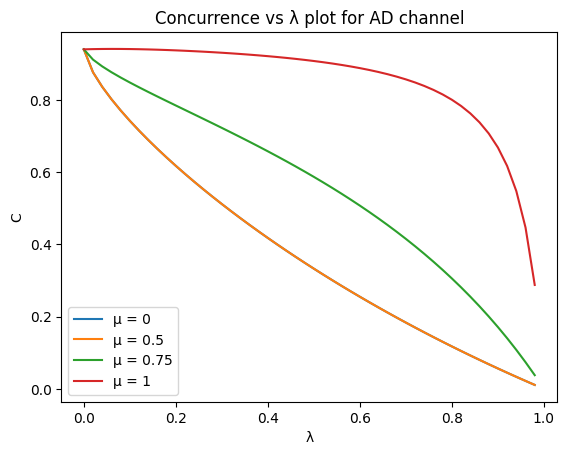

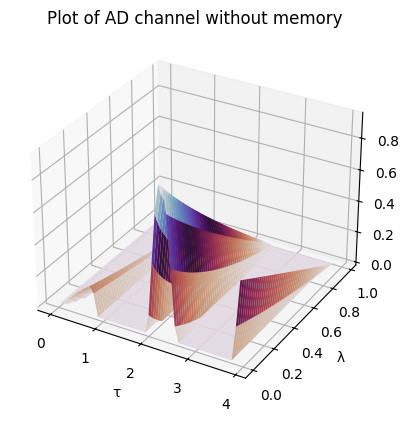

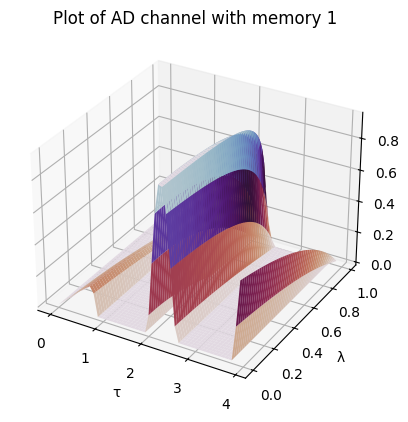

In [7]:
#2D plot
plot2d(lamb,max_time(time,'AD'),memory,'AD')

#3D plot without memory
fig1 = plt.axes(projection = '3d')
fig1.set_xlabel('\u03C4')
fig1.set_ylabel('\u03bb')
fig1.set_zlabel('C')
fig1.set_title("Plot of AD channel without memory")
fig1.plot_surface(T,L,concurrences_ad['0'], cmap = cm.twilight_r)
fig1.view_init()
plt.show()

#3D plot with memory = 1
fig2 = plt.axes(projection = '3d')
fig2.set_xlabel('\u03c4')
fig2.set_ylabel('\u03bb')
fig2.set_zlabel('C')
fig2.set_title("Plot of AD channel with memory 1")
fig2.plot_surface(T,L,concurrences_ad['1'], cmap = cm.twilight_r)
fig2.view_init()
plt.show()



Phase Damping Channel

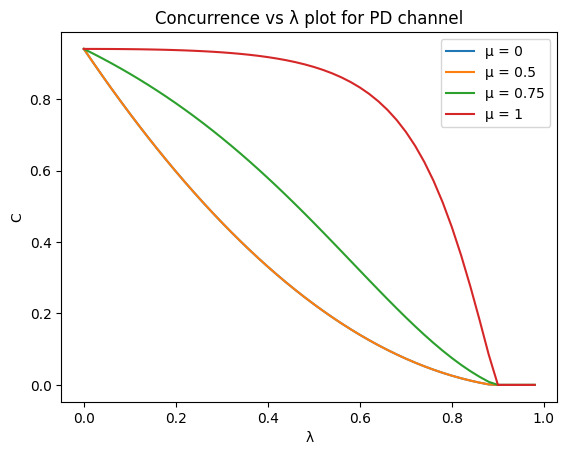

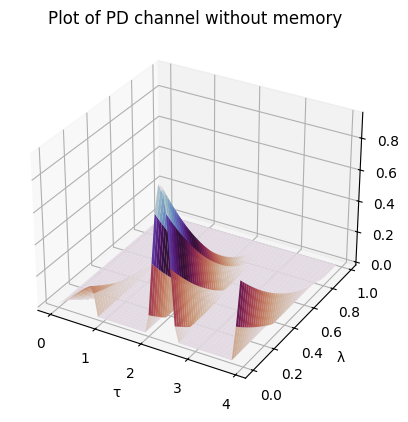

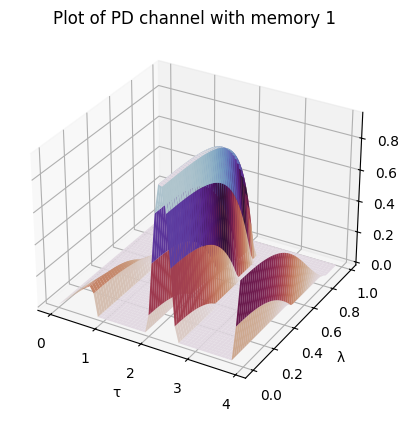

In [8]:
#2D plot
plot2d(lamb,max_time(time,'PD'),memory,'PD')

#3D plot without memory
fig3 = plt.axes(projection = '3d')
fig3.set_xlabel('\u03c4')
fig3.set_ylabel('\u03bb')
fig3.set_zlabel('C')
fig3.set_title("Plot of PD channel without memory")
fig3.plot_surface(T,L,concurrences_pd['0'], cmap = cm.twilight_r)
#fig3.view_init(0,360)
plt.show()

#3D plot with memory = 1
fig4 = plt.axes(projection = '3d')
fig4.set_xlabel('\u03c4')
fig4.set_ylabel('\u03bb')
fig4.set_zlabel('C')
fig4.set_title("Plot of PD channel with memory 1")
fig4.plot_surface(T,L,concurrences_pd['1'], cmap = cm.twilight_r)
#fig4.view_init(0,360)
plt.show()



Depolarisation Channel

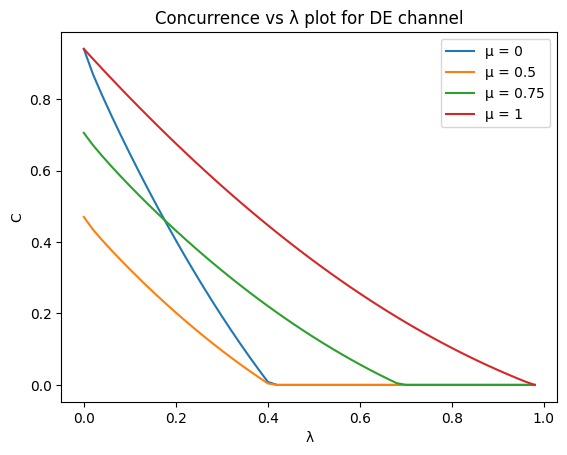

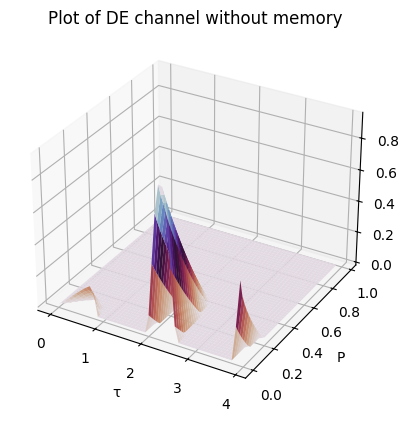

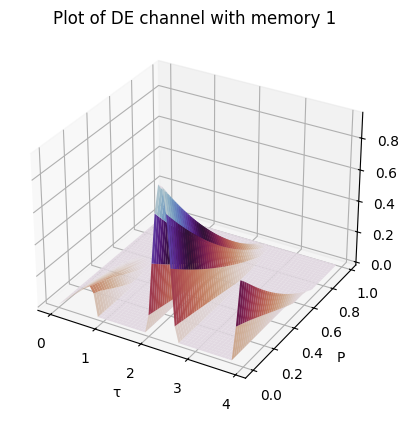

In [9]:
#2D plot
plot2d(lamb,max_time(time,'DE'),memory,'DE')

#3D plot without memory
fig5 = plt.axes(projection = '3d')
fig5.set_xlabel('\u03c4')
fig5.set_ylabel('P')
fig5.set_zlabel('C')
fig5.set_title("Plot of DE channel without memory")
fig5.plot_surface(T,L,concurrences_dp['0'], cmap = cm.twilight_r)
fig5.view_init()
plt.show()

#3D plot with memory = 1
fig6 = plt.axes(projection = '3d')
fig6.set_xlabel('\u03c4')
fig6.set_ylabel('P')
fig6.set_zlabel('C')
fig6.set_title("Plot of DE channel with memory 1")
fig6.plot_surface(T,L,concurrences_dp['1'], cmap = cm.twilight_r)
fig6.view_init()
plt.show()



Plots for PF channel

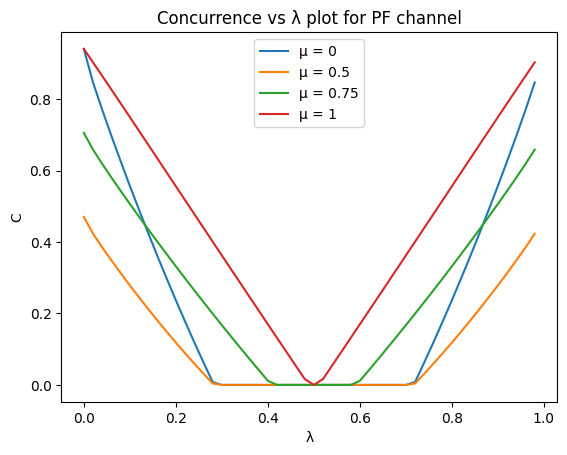

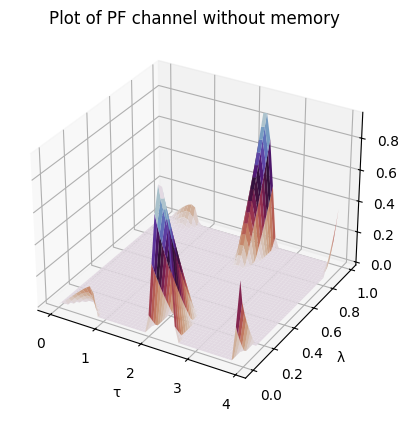

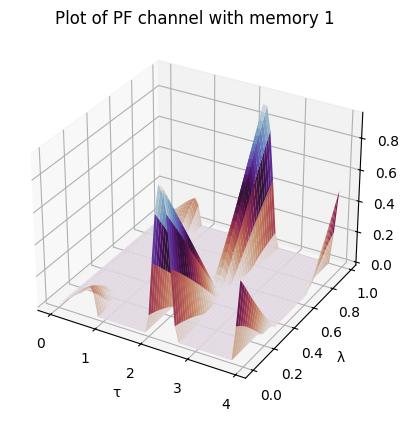

In [10]:
#2D plot
plot2d(lamb,max_time(time,'PF'),memory,'PF')

#3D plot without memory
fig7 = plt.axes(projection = '3d')
fig7.set_xlabel('\u03C4')
fig7.set_ylabel('\u03bb')
fig7.set_zlabel('C')
fig7.set_title("Plot of PF channel without memory")
fig7.plot_surface(T,L,concurrences_pf['0'], cmap = cm.twilight_r)
fig7.view_init()
plt.show()

#3D plot with memory = 1
fig8 = plt.axes(projection = '3d')
fig8.set_xlabel('\u03c4')
fig8.set_ylabel('\u03bb')
fig8.set_zlabel('C')
fig8.set_title("Plot of PF channel with memory 1")
fig8.plot_surface(T,L,concurrences_pf['1'], cmap = cm.twilight_r)
fig8.view_init()
plt.show()



Plot of all three channels at different values of memory

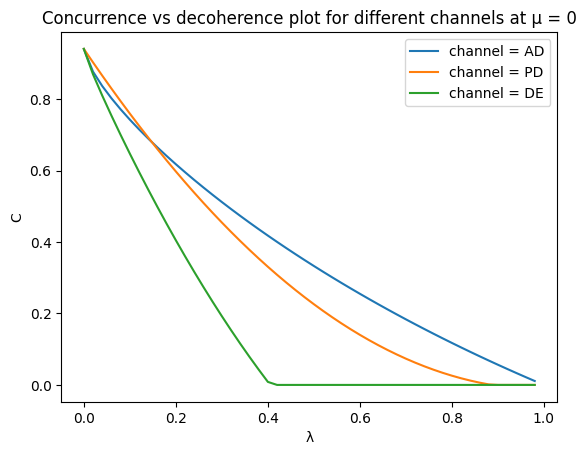

In [11]:
#mu = 0
channels = ['AD','PD','DE']
for channel in channels:
    conc = calculate_concurrence(channel,0,2.24)
    plt.plot(lamb,conc, label = 'channel = {}'.format(channel))
    

plt.legend()
plt.title("Concurrence vs decoherence plot for different channels at \u03bc = 0")
plt.xlabel('\u03bb')
plt.ylabel('C')
plt.show()

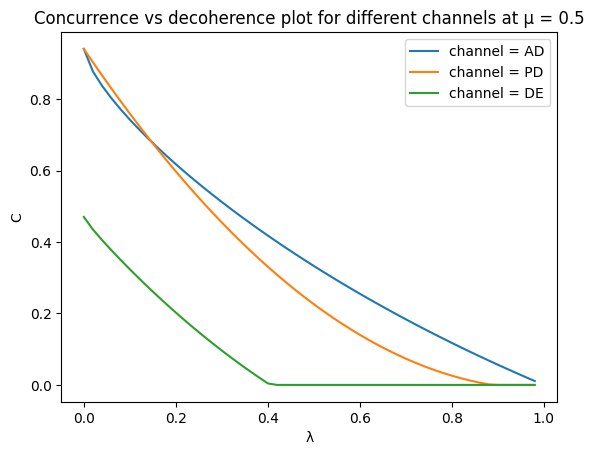

In [12]:
#mu = 0.5
channels = ['AD','PD','DE']
for channel in channels:
    conc = calculate_concurrence(channel,0.5,2.24)
    plt.plot(lamb,conc, label = 'channel = {}'.format(channel))
    

plt.legend()
plt.title("Concurrence vs decoherence plot for different channels at \u03bc = 0.5")
plt.xlabel('\u03bb')
plt.ylabel('C')
plt.show()

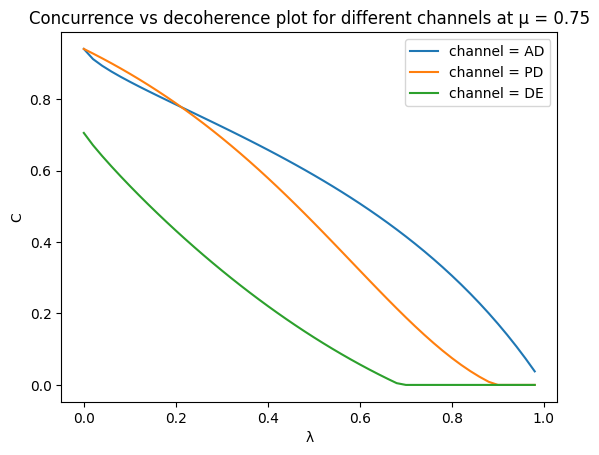

In [13]:
#mu = 0.75
channels = ['AD','PD','DE']
for channel in channels:
    conc = calculate_concurrence(channel,0.75,2.24)
    plt.plot(lamb,conc, label = 'channel = {}'.format(channel))
    

plt.legend()
plt.title("Concurrence vs decoherence plot for different channels at \u03bc = 0.75")
plt.xlabel('\u03bb')
plt.ylabel('C')
plt.show()

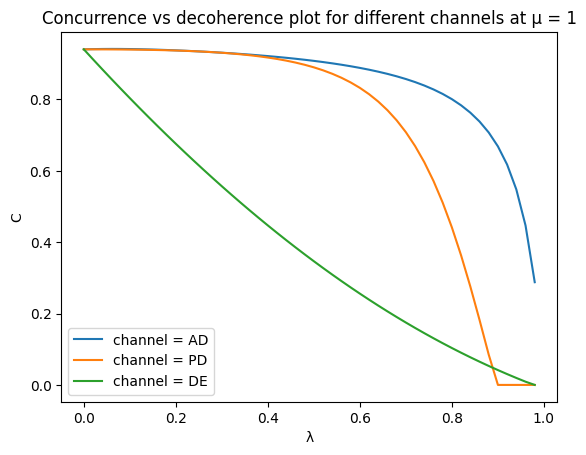

In [14]:
#mu = 1
channels = ['AD','PD','DE']
for channel in channels:
    conc = calculate_concurrence(channel,1,2.24)
    plt.plot(lamb,conc, label = 'channel = {}'.format(channel))
    

plt.legend()
plt.title("Concurrence vs decoherence plot for different channels at \u03bc = 1")
plt.xlabel('\u03bb')
plt.ylabel('C')
plt.show()

Code for Negativity

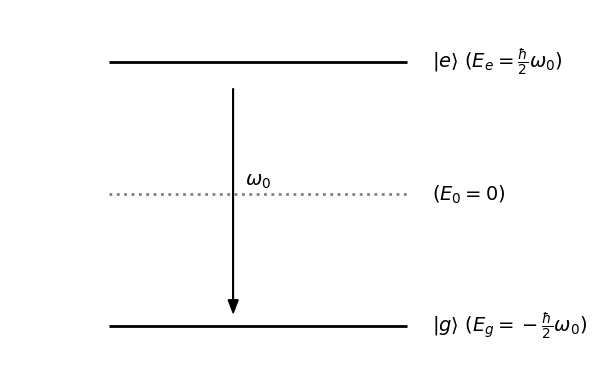

In [15]:
import matplotlib.pyplot as plt

# Define the figure and axis
fig, ax = plt.subplots()

# Plot the energy levels
ax.hlines(y=1, xmin=0.2, xmax=0.8, color='black', linewidth=2)
ax.hlines(y=0.5, xmin=0.2, xmax=0.8, linestyles='dotted', color='gray', linewidth=2)
ax.hlines(y=0, xmin=0.2, xmax=0.8, color='black', linewidth=2)

# Add labels for the states
ax.text(0.85, 1, r'$\vert e \rangle$ ($E_e = \frac{\hbar}{2} \omega_0$)', fontsize=14, verticalalignment='center')
ax.text(0.85, 0.5, r'($E_0 = 0$)', fontsize=14, verticalalignment='center')
ax.text(0.85, 0, r'$\vert g \rangle$ ($E_g = -\frac{\hbar}{2} \omega_0$)', fontsize=14, verticalalignment='center')

ax.arrow(0.45, 0.9, 0, -0.8, head_width=0.02, head_length=0.05, fc='black', ec='black')

# Add label for the transition frequency
ax.text(0.5, 0.55, r'$\omega_0$', fontsize=14, verticalalignment='center', horizontalalignment='center')

# Remove axes
ax.axis('off')

# Set the limits of the plot
ax.set_xlim(0, 1)
ax.set_ylim(-0.2, 1.2)

# Display the plot
plt.show()


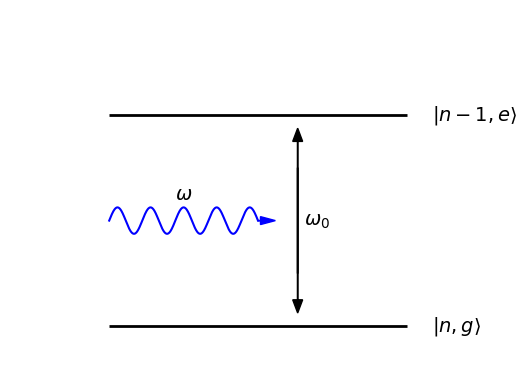

In [16]:
# Define the figure and axis
fig1, bx = plt.subplots()

# Plot the energy levels
bx.hlines(y=0.8, xmin=0.2, xmax=0.8, color='black', linewidth=2)
bx.hlines(y=0, xmin=0.2, xmax=0.8, color='black', linewidth=2)

# Add labels for the states
bx.text(0.85, 0.8, r'$\vert n-1,e \rangle$', fontsize=14, verticalalignment='center')
bx.text(0.85, 0, r'$\vert n,g \rangle$', fontsize=14, verticalalignment='center')

bx.arrow(0.58, 0.2, 0, 0.5, head_width=0.02, head_length=0.05, fc='black', ec='black')
bx.arrow(0.58, 0.6, 0, -0.5, head_width=0.02, head_length=0.05, fc='black', ec='black')


# Add a wiggly arrow for the incident photon
x = np.linspace(0.2, 0.5, 500)
y = 0.4 + 0.05 * np.sin(30 * np.pi * x)
bx.plot(x, y, color='blue')
bx.arrow(0.5, 0.4, 0.005, 0, head_width=0.03, head_length=0.03, fc='blue', ec='blue')


bx.text(0.35, 0.5, r'$\omega$', fontsize=14, verticalalignment='center', horizontalalignment='center')
# Add label for the transition frequency
bx.text(0.62, 0.4, r'$\omega_0$', fontsize=14, verticalalignment='center', horizontalalignment='center')

# Remove axes
bx.axis('off')

# Set the limits of the plot
bx.set_xlim(0, 1)
bx.set_ylim(-0.2, 1.2)

# Display the plot
plt.show()